In [1]:
import pandas as pd
import numpy as np
import geopandas
import geoplot
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('sleep_data.csv')
df_2 = pd.read_csv('clean_sleep_data.csv')
df_3 = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head(100)
df_2.head(100)
df_3.head(100)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,NaN
96,97,Female,36,Accountant,7.2,8,60,4,Normal,115/75,68,7000,NaN
97,98,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,NaN
98,99,Female,36,Teacher,7.1,8,60,4,Normal,115/75,68,7000,NaN


In [16]:
rename_dic = {
    'Person ID': 'person_id',
    'Gender': 'gender',
    'Age': 'age',
    'Occupation': 'occupation',
    'Sleep Duration': 'sleep_duration',
    'Quality of Sleep': 'quality_of_sleep',
    'Physical Activity Level': 'physical_activity_level',
    'Stress Level': 'stress_level',
    'BMI Category': 'bmi_category',  # Adjusted this to match your df_3
    'Blood Pressure': 'blood_pressure',  # Adjusted this to match your df_3
    'Heart Rate': 'heart_rate',  # Corrected spelling here
    'Daily Steps': 'daily_steps',
    'Sleep Disorder': 'sleep_disorder'  # Added to match your df_3
}
df_3.rename(columns=rename_dic, inplace=True)

# Display the first few rows of df_3 after renaming
print(df_3.head())

# Save the cleaned df_3 as a new CSV file
df_3.to_csv('clean_sleep_data_v2.csv', index=False)  # Specify a new filename


   person_id gender  age            occupation  sleep_duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   quality_of_sleep  physical_activity_level  stress_level bmi_category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  blood_pressure  hear_rate  daily_steps sleep_disorder  
0         126/83         77         4200            NaN  
1         125/80         75        1

In [5]:
average_quality_by_gender = df_2.groupby('gender')['sleep_duration'].mean()
average_quality_by_gender.head()
print(average_quality_by_gender)

gender
Female    6.936
Male      6.928
Name: sleep_duration, dtype: float64


In [17]:
average_quality_by_gender_2 = df_3.groupby('gender')['sleep_duration'].mean()
average_quality_by_gender_2.head()
print(average_quality_by_gender_2)

gender
Female    7.229730
Male      7.036508
Name: sleep_duration, dtype: float64


In [16]:
average_quality_by_occupation = df_2.groupby('occupation')['sleep_duration'].mean()

print(average_quality_by_occupation)


occupation
Accountant              7.145833
Doctor                  6.914634
Engineer                6.862069
Lawyer                  6.935484
Manager                 6.989362
Nurse                   7.021505
Sales Representative    6.659794
Salesperson             7.146067
Scientist               6.800000
Software Engineer       6.957895
Teacher                 6.808511
Name: sleep_duration, dtype: float64


ValueError: could not convert string to float: 'Software Engineer'

In [18]:
average_quality_by_occupation_2 = df_3.groupby('occupation')['sleep_duration'].mean()

print(average_quality_by_occupation_2)

occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.063014
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: sleep_duration, dtype: float64


<Axes: xlabel='occupation'>

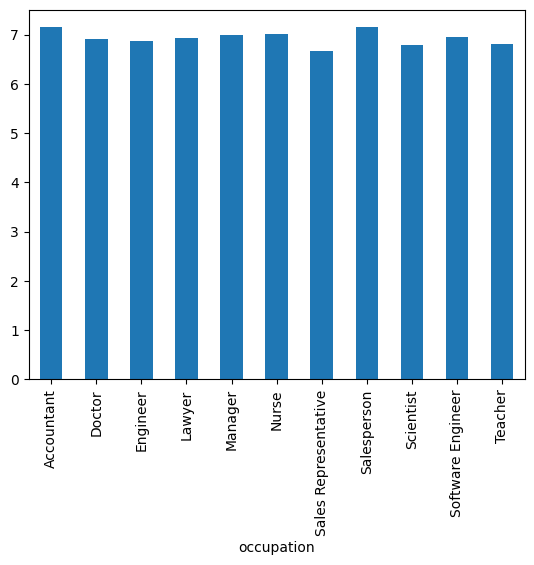

In [7]:
average_quality_by_occupation.reset_index()
average_quality_by_occupation.plot(kind = 'bar', x = 'Occupation', y ='Sleep Duration')

<Axes: xlabel='occupation'>

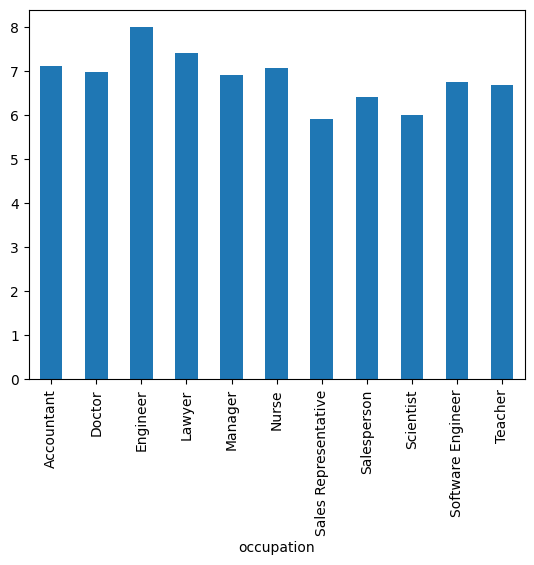

In [19]:
average_quality_by_occupation_2.reset_index()
average_quality_by_occupation_2.plot(kind = 'bar', x = 'Occupation', y ='Sleep Duration')

In [8]:
average_stress_sleep = df_2.groupby('stress_level')['quality_of_sleep'].mean()
print(average_stress_sleep)

stress_level
-2     7.000000
-1     5.250000
 0     6.400000
 1     6.517857
 2     6.461039
 3     6.384921
 4     6.449153
 5     6.531863
 6     6.512987
 7     6.411290
 8     6.508475
 9     6.446429
 10    6.222222
 11    6.250000
 12    6.500000
 13    7.000000
Name: quality_of_sleep, dtype: float64


In [21]:
average_stress_sleep_2 = df_3.groupby('stress_level')['quality_of_sleep'].mean()
print(average_stress_sleep_2)

stress_level
3    8.971831
4    7.671429
5    7.895522
6    7.000000
7    6.000000
8    5.857143
Name: quality_of_sleep, dtype: float64


<Axes: xlabel='stress_level'>

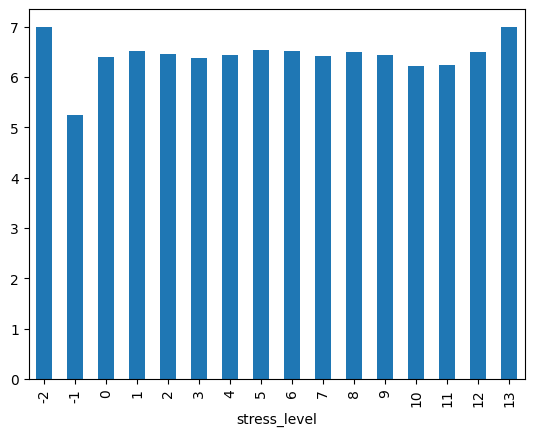

In [37]:
average_stress_sleep.reset_index()
average_stress_sleep.plot(kind = 'bar', x = 'stress_level', y ='quality_of_sleep')

<Axes: xlabel='stress_level'>

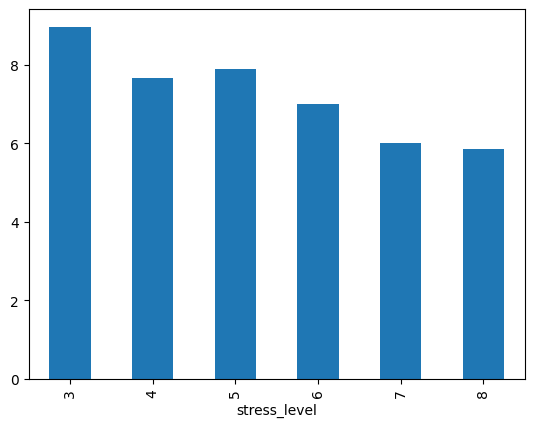

In [22]:
average_stress_sleep_2.reset_index()
average_stress_sleep_2.plot(kind = 'bar', x = 'stress_level', y ='quality_of_sleep')

In [9]:
average_blood_by_sleep = df_2.groupby('occupation')['blood_pressure_1'].mean()
print(average_blood_by_sleep)

occupation
Accountant              123.072917
Doctor                  119.865854
Engineer                119.712644
Lawyer                  120.236559
Manager                 120.106383
Nurse                   119.967742
Sales Representative    119.247423
Salesperson             120.494382
Scientist               119.300000
Software Engineer       119.589474
Teacher                 121.159574
Name: blood_pressure_1, dtype: float64


TypeError: agg function failed [how->mean,dtype->object]

In [13]:
average_physical_activity_level = df_2.groupby('occupation')['physical_activity_level'].mean()
print(average_physical_activity_level)
print(average_quality_by_occupation)

occupation
Accountant              2.739583
Doctor                  3.024390
Engineer                3.011494
Lawyer                  3.053763
Manager                 2.925532
Nurse                   3.043011
Sales Representative    3.010309
Salesperson             2.898876
Scientist               2.862500
Software Engineer       3.010526
Teacher                 2.904255
Name: physical_activity_level, dtype: float64
occupation
Accountant              7.145833
Doctor                  6.914634
Engineer                6.862069
Lawyer                  6.935484
Manager                 6.989362
Nurse                   7.021505
Sales Representative    6.659794
Salesperson             7.146067
Scientist               6.800000
Software Engineer       6.957895
Teacher                 6.808511
Name: sleep_duration, dtype: float64


In [26]:
average_physical_activity_level_2 = df_3.groupby('occupation')['physical_activity_level'].mean()
print(average_physical_activity_level_2)
print(average_quality_by_occupation_2)

occupation
Accountant              58.108108
Doctor                  55.352113
Engineer                51.857143
Lawyer                  70.425532
Manager                 55.000000
Nurse                   78.589041
Sales Representative    30.000000
Salesperson             45.000000
Scientist               41.000000
Software Engineer       48.000000
Teacher                 45.625000
Name: physical_activity_level, dtype: float64
occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.063014
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: sleep_duration, dtype: float64


In [24]:
avergae_age_sleep = df_2.groupby('age')['quality_of_sleep'].mean()
#print(avergae_age_sleep)
print(avergae_age_sleep[32:61]) 

age
41    6.406250
42    6.666667
43    6.689655
44    6.290323
45    6.285714
46    6.411765
47    6.500000
48    6.710526
49    6.277778
50    6.545455
51    6.642857
52    6.600000
53    6.050000
54    6.666667
55    6.600000
56    7.000000
57    6.500000
58    6.000000
60    6.500000
61    5.750000
62    6.500000
67    6.500000
Name: quality_of_sleep, dtype: float64


In [25]:
# Group by age and calculate the mean quality of sleep for each age group
average_sleep_by_age = df_2.groupby('age')['quality_of_sleep'].mean()
print(average_sleep_by_age)


age
5     7.000000
7     6.750000
10    6.250000
11    7.000000
13    8.000000
14    6.375000
15    7.200000
16    7.000000
17    6.727273
18    6.200000
19    6.444444
20    6.458333
21    6.638889
22    6.269231
23    6.653846
24    6.431818
25    6.322581
26    6.240000
27    6.694444
28    6.645833
29    6.435484
30    6.411765
31    6.500000
32    6.534884
33    6.267857
34    6.378049
35    6.509259
36    6.452381
37    6.423077
38    6.529412
39    6.303030
40    6.443182
41    6.406250
42    6.666667
43    6.689655
44    6.290323
45    6.285714
46    6.411765
47    6.500000
48    6.710526
49    6.277778
50    6.545455
51    6.642857
52    6.600000
53    6.050000
54    6.666667
55    6.600000
56    7.000000
57    6.500000
58    6.000000
60    6.500000
61    5.750000
62    6.500000
67    6.500000
Name: quality_of_sleep, dtype: float64


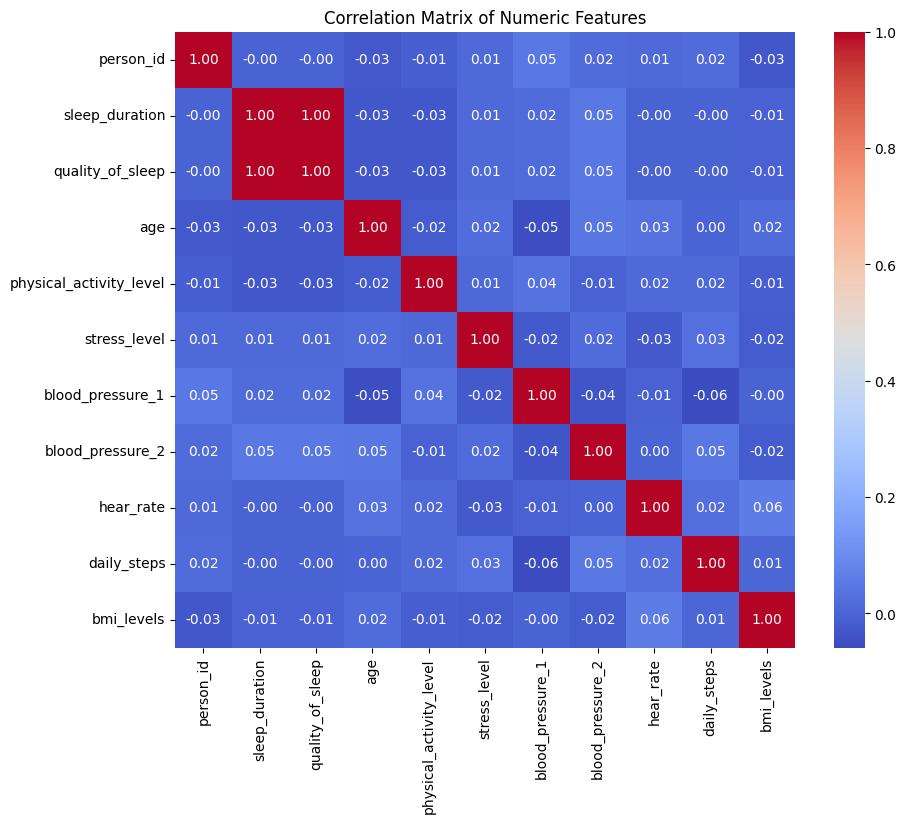

sleep_duration             1.000000
quality_of_sleep           1.000000
blood_pressure_2           0.049442
blood_pressure_1           0.017423
stress_level               0.011467
hear_rate                 -0.002532
daily_steps               -0.002865
person_id                 -0.002922
bmi_levels                -0.006959
age                       -0.033022
physical_activity_level   -0.033918
Name: sleep_duration, dtype: float64
sleep_duration             1.000000
quality_of_sleep           1.000000
blood_pressure_2           0.049442
blood_pressure_1           0.017423
stress_level               0.011467
hear_rate                 -0.002532
daily_steps               -0.002865
person_id                 -0.002922
bmi_levels                -0.006959
age                       -0.033022
physical_activity_level   -0.033918
Name: quality_of_sleep, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_columns = df_2.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Extract correlations with sleep_duration and quality_of_sleep
sleep_duration_corr = correlation_matrix['sleep_duration'].sort_values(ascending=False)
quality_of_sleep_corr = correlation_matrix['quality_of_sleep'].sort_values(ascending=False)

print( sleep_duration_corr)
print( quality_of_sleep_corr)


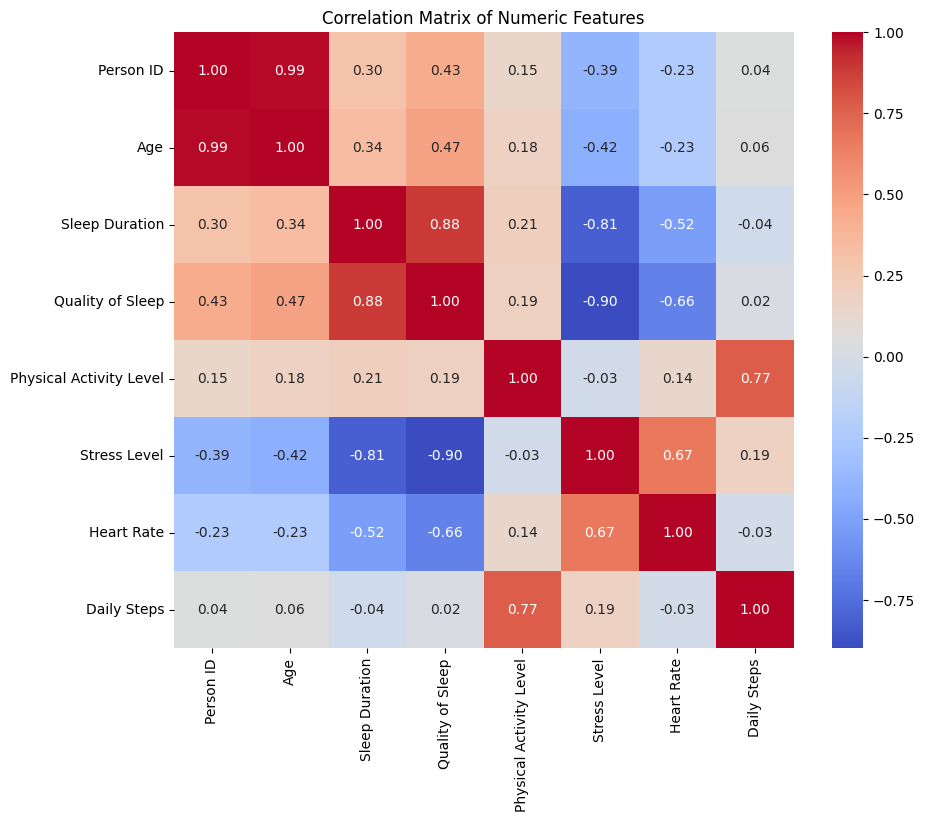

Sleep Duration             1.000000
Quality of Sleep           0.883213
Age                        0.344709
Person ID                  0.296305
Physical Activity Level    0.212360
Daily Steps               -0.039533
Heart Rate                -0.516455
Stress Level              -0.811023
Name: Sleep Duration, dtype: float64
Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Person ID                  0.431612
Physical Activity Level    0.192896
Daily Steps                0.016791
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_columns = df_3.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Extract correlations with sleep_duration and quality_of_sleep
sleep_duration_corr = correlation_matrix['Sleep Duration'].sort_values(ascending=False)
quality_of_sleep_corr = correlation_matrix['Quality of Sleep'].sort_values(ascending=False)

print( sleep_duration_corr)
print( quality_of_sleep_corr)